In [1]:
import warnings

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [2]:
print(__doc__)

Automatically created module for IPython interactive environment


In [3]:
data = load_digits().data
target = load_digits().target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
X_train = X_train / 255.
X_test = X_test / 255.

In [5]:
X_train.shape, X_test.shape

((1437, 64), (360, 64))

In [47]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)

In [48]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 2.31137783
Iteration 2, loss = 2.30167613
Iteration 3, loss = 2.29546021
Iteration 4, loss = 2.28779427
Iteration 5, loss = 2.28070652
Iteration 6, loss = 2.27254172
Iteration 7, loss = 2.26273812
Iteration 8, loss = 2.25155839
Iteration 9, loss = 2.24071329
Iteration 10, loss = 2.22552013
Iteration 11, loss = 2.20889599
Iteration 12, loss = 2.19194680
Iteration 13, loss = 2.17109429
Iteration 14, loss = 2.14584583
Iteration 15, loss = 2.11943620
Iteration 16, loss = 2.08798648
Iteration 17, loss = 2.04892565
Iteration 18, loss = 2.00746212
Iteration 19, loss = 1.95935612
Iteration 20, loss = 1.90983289
Iteration 21, loss = 1.84955330
Iteration 22, loss = 1.78683554
Iteration 23, loss = 1.72106842
Iteration 24, loss = 1.64982171
Iteration 25, loss = 1.57820880
Iteration 26, loss = 1.50256989
Iteration 27, loss = 1.42956614
Iteration 28, loss = 1.35635849
Iteration 29, loss = 1.28446939
Iteration 30, loss = 1.21778037
Iteration 31, loss = 1.15559183
Iteration 32, los

In [49]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.985386
Test set score: 0.975000


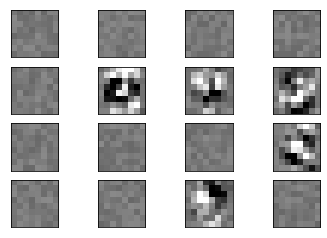

In [50]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(8, 8), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()